<div style="width: 100%; overflow: hidden; text-align:center;">
    <h1>INF-477 Redes Neuronales Artificiales</h1>
    <h2>Tarea 1 - Perceptrones Multicapa o Redes FF</h2><br/>
    <div style="width: 300px; float: left;">
        <h3>Gabriel Jara</h3>
        <h4>``gabriel.jara@usm.cl``</h4>
        <h4>13550188-3</h4>
    </div>
    <div style="width: 300px; float: left;">
        <h3>Francisco Salazar</h3>
        <h4>``fsalazar@alumnos.inf.utfsm.cl``</h4>
        <h4>201273104-6</h4>
    </div>
    <div style="margin-left: 300px;">
        <h3>Daniel San Martín</h3>
        <h4>``daniel.sanmartinr@sansano.usm.cl``</h4>
        <h4>682016101-5</h4>
    </div>
</div>

## 1. El XOR

<img width="25%" src="img/figure1.png">
<center>Fig. 1: Distribución deseada para la actividad 1. Los 2 colores representan 2 clases distintas.</center>

(a) Escriba una función que genere (aleatoriamente) $n$ datos etiquetados de la forma $\{(x_1, y_1), . . . ,(x_n, y_n)\}$, $x_i \in \mathbb{R}^2$, $y_i \in \{0, 1\}$, con una distribución de probabilidad que refleje la configuración linealmente inseparable que muestra la Fig.1. Utilice esta función para generar un conjunto de 1000 datos de entrenamiento y 1000 datos de pruebas. El problema de clasificación obtenido se denomina en ocasiones “XOR”. ¿Por qué?

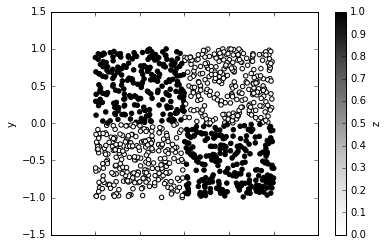

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n = 1000
rng = np.random.RandomState(0)
X = rng.uniform(low=-1.0,high=1.0,size=(n,2))
Y = np.logical_xor(X[:,0] > 0, X[:,1] > 0)
M = np.c_[X, Y]

df = pd.DataFrame(M, columns=['x', 'y', 'z'])
df.plot.scatter(x='x', y='y', c='z')
    
plt.show()

La denominación XOR hace referencia a la operación lógica conocida como "o exclusivo" <i>(X-OR)</i>. Al igual que el operador OR recibe como entrada dos valores lógicos, cada uno de estos verdadero o falso. OR será verdadero si uno de los valores de entrada es verdadero, mientras que XOR será verdadero si y sólo si uno de los valores de entrada es verdadero. En otras palabras, a diferencia de OR, cuando las dos entradas son verdaderas XOR devolverá falso. Otra interpretación es que XOR evalúa si los valores de entrada son diferentes entre sí. 

Se ha demostrado que para garantizar convergencia en un problema a resolver por un perceptrón simple, se requiere que los datos puedan separarse linealmente, esto es, que exista un hiperplano que separe los elementos según su clase. El problema de XOR es un ejemplo de problema que no puede separarse linealmente de acuerdo a clase.

Se necesita al menos dos líneas para separar las clases de un problema tipo XOR, por lo cual no es posible que una única neurona sea capaz de aprender un hiperplanos que efectivamente logre separar ambas clases de observaciones.

(b) Demuestre experimentalmente que una neurona artificial individual no puede resolver satisfactoriamente el problema anterior. Puede utilizar la función de activación y el método de entrenamiento que prefiera. Sea convincente. Describa y explique lo que observa.

Coeficiente 0 0.000110455650552
Coeficiente 1 -0.00254294060508
Sesgo 0.0
Precisión:50.2%


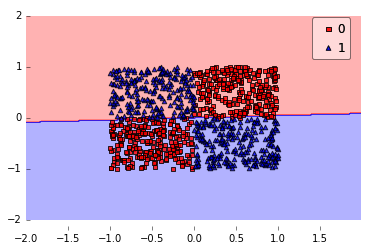

In [12]:
from mlxtend.evaluate import plot_decision_regions
from sklearn.linear_model import perceptron
from pandas import *

net = perceptron.Perceptron(n_iter=100, verbose=0, random_state=None, 
                            fit_intercept=True, eta0=0.002)
net.fit(X, Y)

print("Coeficiente 0 " + str(net.coef_[0,0]))
print("Coeficiente 1 " + str(net.coef_[0,1]))
print("Sesgo " + str(net.intercept_[0]))
print("Precisión:" + str(net.score(X, Y)*100) + "%")

plot_decision_regions(X, Y.astype(np.integer), clf=net)
plt.show()

El experimento precedente aprovecha la existencia del módulo <i>sklearn.linear_model.Perceptron</i>, lo cual lógicamente facilita la programación y resulta eficiente. Sin embargo, sólo en beneficio de completar la demostración y especialmente con fines pedagógicos, se repite a continuación el experimento utilizando un sensillo Perceptron desarrollado "a mano" para estos efectos.

Coeficiente 0 -0.016372577786
Coeficiente 1 0.00122560531563
Sesgo -2.08166817117e-17
Precisión:49%


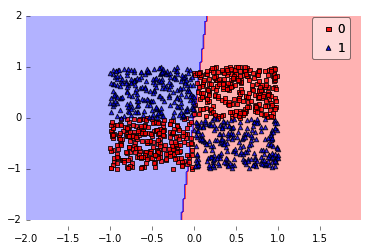

In [8]:
class Perceptrongj(object):

    def __init__(self, eta=0.02, epochs=100):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
           
        self.w_ = np.zeros(1 + X.shape[1])

        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (yi - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

ppn = Perceptrongj(epochs=100, eta=0.02)
ppn.train(X, Y)
ypr = ppn.predict(X)
Coef = ppn.w_
print("Coeficiente 0 " + str(Coef[1]))
print("Coeficiente 1 " + str(Coef[2]))
print("Sesgo " + str(Coef[0]))
ypr = (ypr + 1)/2
error2= (Y.astype(int) - ypr)*(Y.astype(int) - ypr)
print("Precisión:" + str(((len(Y)-error2.sum()))*100/len(Y)) + "%")
plot_decision_regions(X, Y.astype(np.integer), clf=ppn)
plt.show()


Se aprecia que en ambos casos el resultado ha sido análogo, ya sea utilizando el módulo <i>sklearn.linear_model.Perceptron</i> como al programar directamente el perceptron.  

Al realizar los experimentos y analizar los resultados, se aprecia que con una neurona artificial no es posible resolver el problema XOR con una precisión significativamente mayor a 50%, es decir el resultado es prácticamente tan bueno como el que se obtendría aleatoriamente. Gráficamente se observas que el borde de decisión no consigue separar ambas clases, lo cual ocurre dada las características del XOR, que lo convierten en un problema linealmente no separable. Aprovechando el resultado numérico provisto por *scikit-learn*, el porcentaje de precisión es de solo la mitad, muy lejano a un valor aceptable en cuanto a resultados cuantitativos.

Por lo anterior, se concluye que la función XOR necesita al menos dos líneas para separar las dos clases. Una única neurona artificial no podría lograr el aprendizaje requerido en este escenario, se necesita al menos una capa de perceptrones más.

(c) Demuestre experimentalmente que un perceptron multicapas puede resolver satisfactoriamente el problema obtenido en (a). Puede utilizar la arquitectura y el método de entrenamiento que prefiera. Sea
convincente. Describa y explique lo que observa.

Using Theano backend.


  32/1000 [..............................] - ETA: 0s
Test score: 0.009803828781
Test accuracy: 0.988


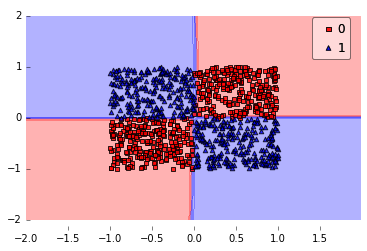

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(20, input_dim=X.shape[1], init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

# Compilar modelo
sgd = SGD(lr=0.8)
model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])

# Ajuste de modelo
model.fit(X, Y, nb_epoch=400, verbose=0)

# Evaluar modelo
scores = model.evaluate(X, Y)

print("")
print('Test score: ' + str(scores[0]))
print('Test accuracy: ' + str(scores[1]))

plot_decision_regions(X, Y.astype(np.integer), clf=model)
plt.show()

A diferencia del caso anterior, con un perceptrón multicapa se logró resolver fácilmente el problema, puesto que ya no depende de si el problema es linealmente separable o no. Se observa que el borde de decisión coincide de manera muy acertada a la distribución del XOR entregando un resultado de 99% de precisión.

Para resolver el problema de XOR con perceptrón multicapa se necesita de una <i>hidden layer</i>, compuesta de por lo menos dos neuronas, donde cada una se encargará de establecer un límite de decisión, los que operando conjuntamente permiten obtenemos la salida esperada. 

## 2. Predicción del Precio de una Casa

En esta sección trabajaremos con un pequeño dataset conocido como *Boston Housing* que nos permitirá experimentar de modo más completo y exhaustivo con las técnicas bajo estudio. El problema consiste en predecir el precio de una casa en una zona/barrio de Boston (USA) a partir de una serie de atributos que describen el lugar que éste se ubica: tasa de criminalidad, proporción de zona residencial, proporción de zona industrial, si se encuentra junto al río o no, contaminación atmosférica medida como la concentración de óxidos nítricos en el aire, etc. Para ver en detalle la descripción de la semántica asociada a los atributos de
este problema, puede consultar https://archive.ics.uci.edu/ml/datasets/Housing.

<img src="img/figure2.png">


(a) Construya un dataframe con los datos a analizar descargando los datos desde la URL mantenida por los autores de [1]. Explique qué hacen las líneas 5 a 9.

In [15]:
import pandas as pd
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'

df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

from sklearn.cross_validation import train_test_split
df_train, df_test= train_test_split(df, test_size=0.25, random_state=0)

Respecto a las lineas 4 a 7 del código en la pregunta (a) básicamente leen los datos y los almacenan como variable <i>df</i>, estableciendo los nombres de las columnas. Luego de importar la librería <i>train_test_split</i> se establece que la carpeta destinada a testing corresponderá a un 25% y su muestreo no será aleatorio por lo que los resultados serán reproducibles. 

Las líneas 5 al 9 en el código de la pregunta (d) establecen en primer lugar que la variable <i>model</i> es un modelo conformado por la combinación lineal de capas sequienciales, es decir la topología clásica de una red neuronal multicapas. La siguiente línea agrega una capa oculta de 200 neuronas, la que recibe una entrada de la dimensión correspondiente a la matriz de variables predictoras (X), y cuyos parámetros beta tienen su valor inicial (previo a entrenamiento) distribuidos uniformemente. La siguiente linea incorpora una función de activación sigmoidal a la capa precedente. La línea 8 agrega la capa de salida, de una única neurona, que con la línea 9 queda asignada a una función de activación lineal, adecuada al problema de regresión que se requiere resolver.    

(b) Describa brevemente el dataset utilizar.

In [16]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(9), int64(5)
memory usage: 55.4 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.347826,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.083004,356.674032,12.653063,22.532806
std,8.601545,23.310593,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.280574,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.000000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.000000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.000000,391.440000,11.360000,21.200000
75%,3.677082,12.000000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.000000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


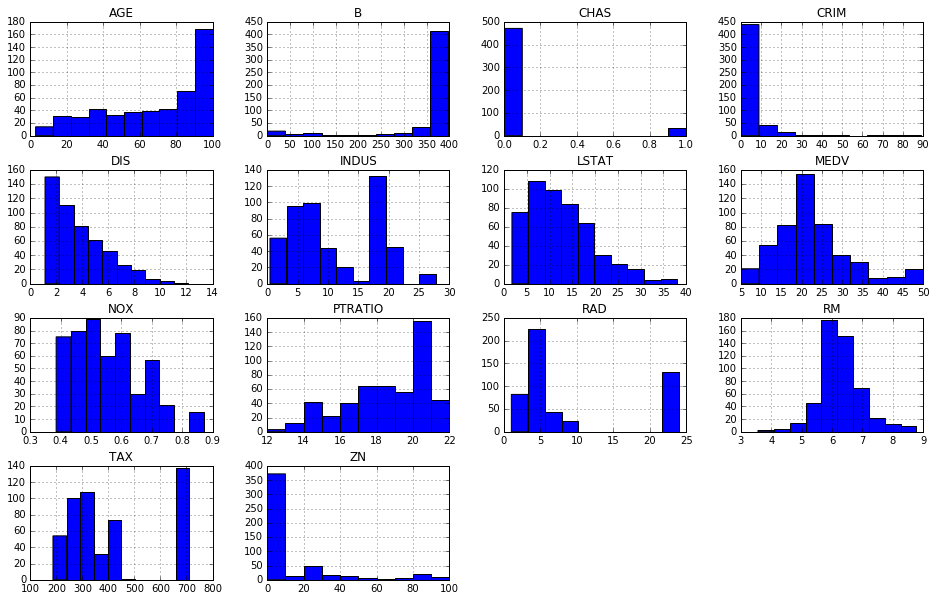

In [17]:
df.hist(figsize=(16,10))
plt.show()

El dataset cosiste en 506 observaciones sobre las que se levanta 14 atributos. Cada observación se refiere a un suburbio localizado en la ciudad de Boston. La variable dependiente, que se espera predecir, corresponde al valor medio de las propiedades en el suburbio. Para ello se recurre a variables independientes que consideran diversos índices de: criminalidad, uso de suelo, industria, acceso al río, contaminación, número medio de habitaciones, antigüedad de las construcciones, distancia a centros urbanos, impuestos, acceso a educación, población afroamericana y situación socioeconómica. En general todas son variables continuas, a excepción de la presencia o no del río, que naturalmente es binaria. 

La información específica obtenida desde la web, detalla los datos de la siguiente forma:

Attribute Information:

1. CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per $10,000
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population
* MEDV Median value of owner-occupied homes in \$1000's

(c) Normalice los datos antes de trabajar. Explique la importancia/conveniencia de realizar esta operación.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)

# Normalización del conjunto de entrenamiento
X_train_scaled = pd.DataFrame(scaler.transform(df_train), columns=df_train.columns)
y_train_scaled = X_train_scaled.pop('MEDV')

# Normalización del conjunto de testing
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)
y_test_scaled = X_test_scaled.pop('MEDV')

En <i>Machine Learning</i> es generalmente recomendado (salvo contadas excepciones) realizar normalización de las variables predictoras antes de entrenar el modelo, así como en su posterior aplicación con fines de validación o predictivos. El principal beneficio que genera es regular la forma que adquiere la función de error respecto a los parámetros tetha. Cuando una variable de entrada se mueve en un rango muchas veces supeperior a otra variable de entrada, el parámetro tetha asociada a la primera variable tenderá a variar en un rango muy ajustado en comparación con la variación del segundo parámetro tetha. Como resultado, al aplicar <i>gradient descent</i> se estará en cada iteración consistentemente exagerando el ajuste respecto a una variable y subestimando el ajuste para la otra. La normalización, o al menos ajuste de rangos entre variables, permite que la función de error se comporte de forma más homogénea entre parámetros, conformando áreas de error circulares por las que <i>gradient descent</i> consigue avanzar de forma más rápida y directa hacia el óptimo global, lo cual incluso reduce el riesgo de que se estanque en mínimos locales.  

En el caso del presente análisis, se observa que algunas de las variables predictoras que componen el dataset se mueven en el orden de las centenas, mientras que otras variables no superan la unidad. Por ejemplo el ratio que mide la tasa impositiva respecto al valor de las propiedades (TAX) adquiere valores entre 180 y 720, mientras que el índice de contaminación por oxido nítroso se encuentra entre 0.37 y 0.88. Por lo tanto, de no aplicarse normalización, el proceso de entrenamiento de la red neuronal sería ineficiente, demorando más iteraciones en alcanzar la vecindad del oṕtimo global y con mayor propensión a quedar atascado en un óptimo local. 

(d) Muestre en un gráfico el error cuadrático (MSE) vs número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 200 unidades ocultas y función de activación *sigmoidal*. Entrene la red usando gradiente descendente estocástico con *learning rate* 0.2 y 300 epochs de entrenamiento, en el conjunto de entrenamiento y de test. Comente.

In [60]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform', activation='sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.2)
model.compile(optimizer=sgd, loss='mean_squared_error')

hist1 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

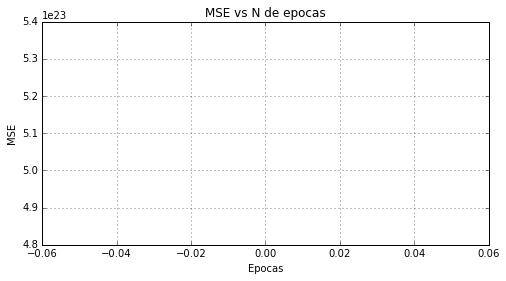

Último MSE: nan


In [61]:
plt.figure(figsize=(8, 4))
plt.plot(hist1.epoch, hist1.history['loss'])
plt.title("MSE vs N de epocas")
plt.xlabel("Epocas")
plt.ylabel("MSE")
plt.grid(True)
plt.show()
print("Último MSE: " + str((hist1.history['loss'][-1])))


Al entrenar la red utilizando <i>sigmoid</i> como función de activación, con <i>learning rate</i> de 0.2, el proceso de aprendizaje no converge, tendiendo el error a infiníto. Esto es debido a que al elegir un <i>learning rate</i> demasiado alto, al aplicar <i>gradient descent</i> en lugar de aproximarse a el error mínimo el modelo cae en un punto aún más alejado, en el sentido opuesto. Depediendo de que tan grande sea el <i>learning rate</i>, bastará algunas iteraciones para que el error cuadratico ya no pueda ser computado. La gráfica precedente indica que, en este caso con <i>learning rate</i> de 0.2, desde la primera iteración el error cuadrático ya resulto inmanejable. 

(e) Repita el paso anterior, utilizado 'Relu' como función de activación y compare con lo obtenido en d).

In [62]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform',  activation='relu'))
model.add(Dense(1, init='uniform', activation='linear'))

sgd = SGD(lr=0.2)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist2 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

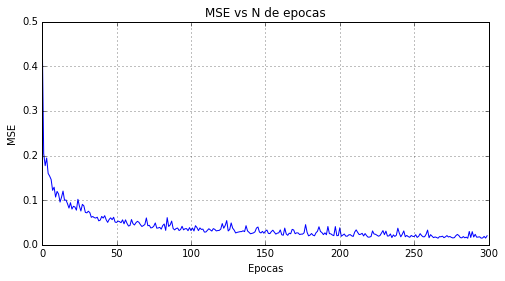

Último MSE: 0.0202548570395


In [63]:
plt.figure(figsize=(8, 4))
plt.plot(hist2.epoch, hist2.history['loss'])
plt.title("MSE vs N de epocas")
plt.xlabel("Epocas")
plt.ylabel("MSE")
plt.grid(True)
plt.show()
print("Último MSE: " + str((hist2.history['loss'][-1])))

Al entrenar nuevamente la red con <i>learning rate</i> de 0.2, pero esta vez utilizando función de activación <i>ReLu</i>, se observa que en esta ocasión sí logra converger. <i>ReLu</i> es una función por partes que en caso de recibir una entrada negativa es igual a cero, y en caso de recibir entrada positiva es simplemente una función lineal. Se diferencia de <i>sigmoid</i> en que no se satura, puesto que no está acotada por arriba. Se ha demostrado que con ReLu se obtiene redes neuronales más esparcidas, lo que se cree incide positivamente en el desempeño. En el presente caso, se aprecia que converge a un error cuadrático significativamente bajo, de sólo 0.02, lo cual podría ser señal de <i>overfitting</i>.

Es difícil aventurar una explicación precisa sobre por qué en este caso el uso de <i>ReLu</i> habría aumentado la tolerancia a un elevado <i>learning rate</i>, respecto a la misma red utilizando <i>sigmoid</i>. Una posibilidad sería suponer que al no activarse necesariamente la totalidad de las neuronas de la red, ésta logra ajustar el impulso excesivo generado en <i>gradient descent</i>, actualizando la red por partes. De esta forma, la red logra administrar un <i>learning rate</i> mayor utilizando <i>ReLu</i> en lugar de <i>sigmoid</i>, aunque con un <i>learning rate</i> suficientemente alto también divergerá. 

(f) Repita d) variando el learning rate. Comente.

Learning Rate: 0.0, Ultimo MSE de Entrenamiento: 1.039
Learning Rate: 0.01, Ultimo MSE de Entrenamiento: 0.244
Learning Rate: 0.02, Ultimo MSE de Entrenamiento: 0.28
Learning Rate: 0.03, Ultimo MSE de Entrenamiento: 0.124
Learning Rate: 0.04, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.05, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.06, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.07, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.08, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.09, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.1, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.11, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.12, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.13, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.14, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.15, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.16, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.17, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.18, Ul

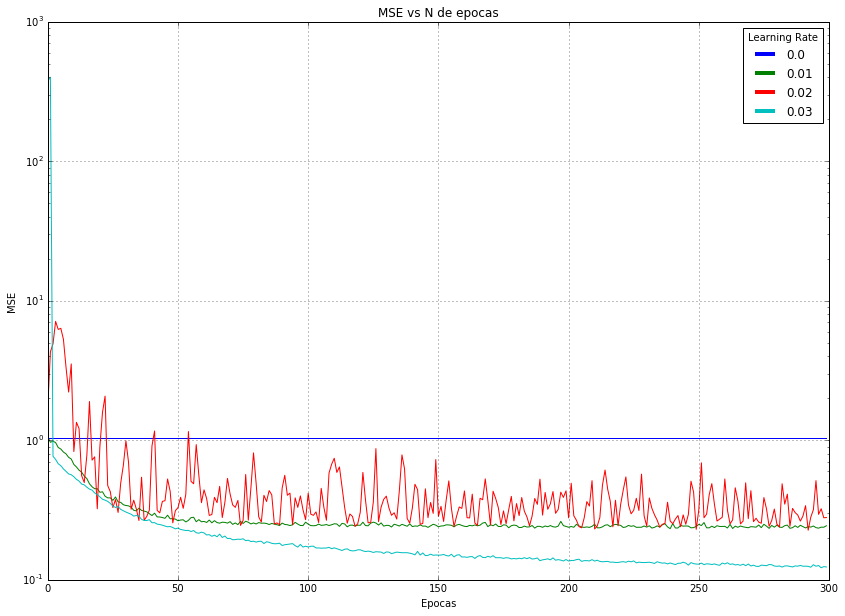

In [78]:
import numpy as np

n_lr = 21
lear_rate = np.linspace(0,0.2,n_lr)

plt.figure(figsize=(14, 10))

for i in range(n_lr):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform', activation='sigmoid'))
    model.add(Dense(1, init='uniform', activation='linear'))
    sgd = SGD(lr=lear_rate[i])
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print("Learning Rate: "+str(round(lear_rate[i],3)) + ", Ultimo MSE de Entrenamiento: " + str(round(hist.history['loss'][-1], 3)))
    #if (i+1) % 4 == 0:
    #    plt.loglog(hist.epoch, hist.history['loss'], label=str(round(lear_rate[i], 3)))
    if np.isnan(hist.history['loss'][-1]) == False:
        plt.semilogy(hist.epoch, hist.history['loss'], label=str(round(lear_rate[i], 3)))
    
    
plt.title("MSE vs N de epocas")
plt.xlabel("Epocas")
plt.ylabel("MSE")
plt.grid(True)
leg = plt.legend(title="Learning Rate")
# Ancho de lineas en legend
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)
plt.show()

Dada la observación obtenida en el punto (d) que señala que utilizando <i>sigmoid</i> el aprendizaje diverge con <i>learning rate</i> de 0.2, se estima más conveniente realizar las siguientes observaciones con <i>learning rate</i> variando en el tramo de 0 a 0.2. Se aprecia sólo los primeros tres experimentos, con <i>learning rate</i> igual a 0.03, fueron convergentes. Los resultados indican también la sensibilidad del modelo respecto al valor de <i>learning rate</i>, se aprecia que algunos <i>learning rate</i> generan una mayor volatilidad del error cuadrático. El menor error de convergencia se logra con el <i>learning rate</i> más grande que no diverge. 

Se considera adecuado profundizar en este resultado reduciendo el tramo de <i>learning rate</i> en observación. Se repite el experimento anterior, esta vez para <i>learning rate</i> entre 0 y 0.04. Para mantener la claridad de la gráfica se ha reducido a 8 los experimentos sobre este tramo. 

Learning Rate: 0.0, Ultimo MSE de Entrenamiento: 1.055
Learning Rate: 0.006, Ultimo MSE de Entrenamiento: 0.237
Learning Rate: 0.011, Ultimo MSE de Entrenamiento: 0.246
Learning Rate: 0.017, Ultimo MSE de Entrenamiento: 0.253
Learning Rate: 0.023, Ultimo MSE de Entrenamiento: 0.22
Learning Rate: 0.029, Ultimo MSE de Entrenamiento: 0.139
Learning Rate: 0.034, Ultimo MSE de Entrenamiento: nan
Learning Rate: 0.04, Ultimo MSE de Entrenamiento: nan


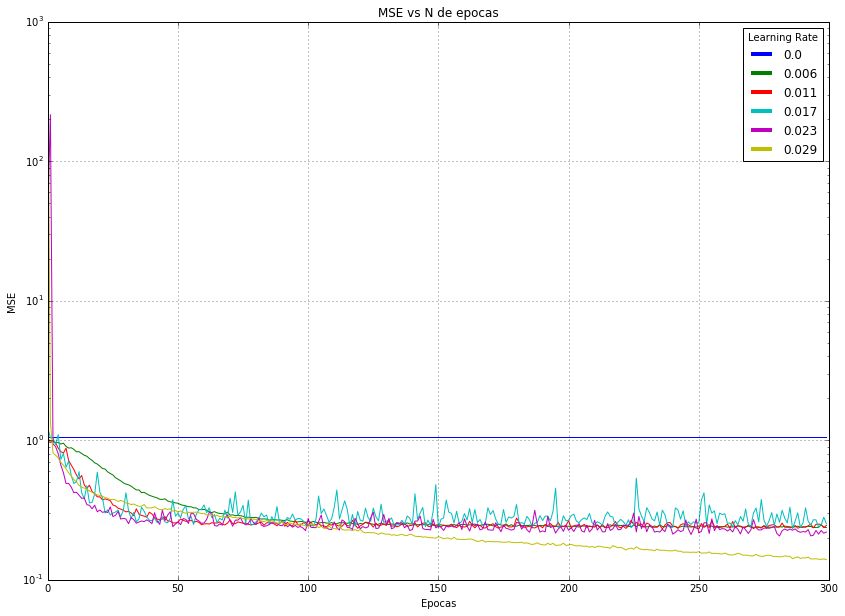

In [82]:
import numpy as np

n_lr = 8
lear_rate = np.linspace(0,0.04,n_lr)

plt.figure(figsize=(14, 10))

for i in range(n_lr):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform', activation='sigmoid'))
    model.add(Dense(1, init='uniform', activation='linear'))
    sgd = SGD(lr=lear_rate[i])
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print("Learning Rate: "+str(round(lear_rate[i],3)) + ", Ultimo MSE de Entrenamiento: " + str(round(hist.history['loss'][-1], 3)))
    #if (i+1) % 4 == 0:
    #    plt.loglog(hist.epoch, hist.history['loss'], label=str(round(lear_rate[i], 3)))
    if np.isnan(hist.history['loss'][-1]) == False:
        plt.semilogy(hist.epoch, hist.history['loss'], label=str(round(lear_rate[i], 3)))
    
    
plt.title("MSE vs N de epocas")
plt.xlabel("Epocas")
plt.ylabel("MSE")
plt.grid(True)
leg = plt.legend(title="Learning Rate")
# Ancho de lineas en legend
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)
plt.show()

El comportamiento observado anteriormente se repite. El menor error de convergencia se observa para el mayor <i>learning rate</i> que no diverge, que incluso después de 300 iteraciones sigue austandose a la baja, lo que podría ser señal de <i>overfitting</i>. Algunos <i>learning rate</i> dan lugar a patrones más volátiles de comportamiento del error cuadrático, en otros casos se generan curvas más lisas, aunque la mayoría converge (en un sentido no estricto) en torno a un error cuadrático de 0.23. Durante las primeras iteraciones, cuando el <i>learning rate</i> es relativamente grande, se alcanzan valores de error significativamente altos, lo que denota estar en una zona de riesgo de divergencia.  

(g) Estime el error de predicción de los modelos d) y e) usando validación cruzada con un número de folds igual a $K = 5$ y $K = 10$. Recuerde que para que la estimación sea razonable debe ajustar los pesos del modelo de nuevo, cada vez que trabaja sobre un determinado fold. Mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.

Debido a la observación realizada en el punto (d) respecto a que con <i>sigmoid</i> como función de activación, con <i>learning rate</i> de 0.2 el entrenamiento no converge a un mínimo error, la prueba de <i>cross validation</i> se realizará para un <i>learning rate</i> diferente. Si bien es tentador probar los mayores <i>learning rate</i> que no divergieron en los ejercicios anteriores, se corre un mayor riesgo de divergencia dentro de alguna carpeta de validación, por lo que se privilegiará un <i>learning rate</i> más estable, dentro de los que ya fueron utilizados previamente, con el objeto de poder comparar los resultados con y sin validación cruzada. 

In [95]:
from sklearn import cross_validation

Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()

kfold = cross_validation.KFold(len(Xm), 5)
cvscores = []
for i, (train, val) in enumerate(kfold):
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform', activation='sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.023)
    model.compile(optimizer=sgd, loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300, verbose=0)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
    
mse_cv = np.mean(cvscores)
print(", MSE con K=5: " + str(mse_cv))

kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform', activation='sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.023)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300, verbose=0)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
    
mse_cv = np.mean(cvscores)
print(", MSE con K=10:" + str(mse_cv))

32/37 [========================>.....] - ETA: 0s, MSE con K=10:0.265327280957


En los experimentos realizados en el punto (f) se había obtenido, usando <i>sigmoid</i>, que con un <i>learning rate</i> de 0.023 se alcanzaba error cuadrático medio de 0.22 después de 300 iteraciones. Al repetir estas condicions con <i>cross validation</i> de $k=5$ carpetas se observa que el error cuadrático aumenta a 0.26, mismo resultado se aprecia en el caso con $k=10$ carpetas. Por lo tanto, se puede esperar que para nuevas observaciones, es decir suburbios en Boston diferentes a las observaciones de entrenamiento originales, se podrá estimar el valor medio de las propiedades con un error cuadrático de 0.26, en lugar de los 0.22 que resultan dentro de la misma muestra. 

Se repite el experimento a continuación, esta vez con <i>ReLu</i> como función de activación y <i>learning rate</i> de 0.2, configuración que en el punto (e) resulto en un error cuadrático especialmente bajo, de sólo 0.02. 

In [97]:
from sklearn import cross_validation

Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()

kfold = cross_validation.KFold(len(Xm), 5)
cvscores = []
for i, (train, val) in enumerate(kfold):
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd, loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300, verbose=0)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
    
mse_cv = np.mean(cvscores)
print(", MSE con K=5: " + str(mse_cv))

kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300, verbose=0)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
    
mse_cv = np.mean(cvscores)
print(", MSE con K=10:" + str(mse_cv))

32/37 [========================>.....] - ETA: 0s, MSE con K=10:0.120878713629


Claramente al usar validación cruzada se obtuvo error cuadrático mucho mayor al 0.02 que se observa dentro de la misma muestra de alimentación, alcanzando 0.13 con $K=5$ y 0.12 con $K=10$. Entonces se espera que 0.13 sea una estimación razonable del error cuadrático que se debería observar al utilizar este modelo para predecir el valor medio de las propiedades en nuevos suburbios, no contenidos en las observaciones ya analizadas. 

(h) Entrene el modelo obtenido en d) usando progressive decay Compare y comente

A continuación se utilizará la red con función de activación <i>sigmoid</i>, nuevamente con <i>learning rate</i> igual a 0.023 como en el caso anterior, pero utilizando además la estrategia denominada <i>progressive decay</i>, en la cual el <i>learning rate</i> va disminuyendo progresivamente en cada iteración. La librería Keras implementa la siguiente función para actualizar el <i>learning rate</i>:
$$ lr_{i} = lr_{0}\cdot\frac{1}{(1+decay\cdot i)} $$, donde $decay$ es un parámetro de entrada para este método y $lr_{i}$ representa el <i>learning rate</i> en la iteración $i$. Puesto que el factor <i>decay</i> puede adquirir diversos valores, se probará en primer lugar 10 valores distribuidos en escala logarítmica entre $10^{⁻6}$ y 1. 

Progressive decay: 1e-06, Ultimo MSE de Entrenamiento: 0.224
Progressive decay: 5e-06, Ultimo MSE de Entrenamiento: 0.251
Progressive decay: 2.2e-05, Ultimo MSE de Entrenamiento: 0.207
Progressive decay: 0.0001, Ultimo MSE de Entrenamiento: 0.22
Progressive decay: 0.000464, Ultimo MSE de Entrenamiento: 0.219
Progressive decay: 0.002154, Ultimo MSE de Entrenamiento: 0.23
Progressive decay: 0.01, Ultimo MSE de Entrenamiento: 0.247
Progressive decay: 0.046416, Ultimo MSE de Entrenamiento: 0.42
Progressive decay: 0.215443, Ultimo MSE de Entrenamiento: 0.803
Progressive decay: 1.0, Ultimo MSE de Entrenamiento: 0.956


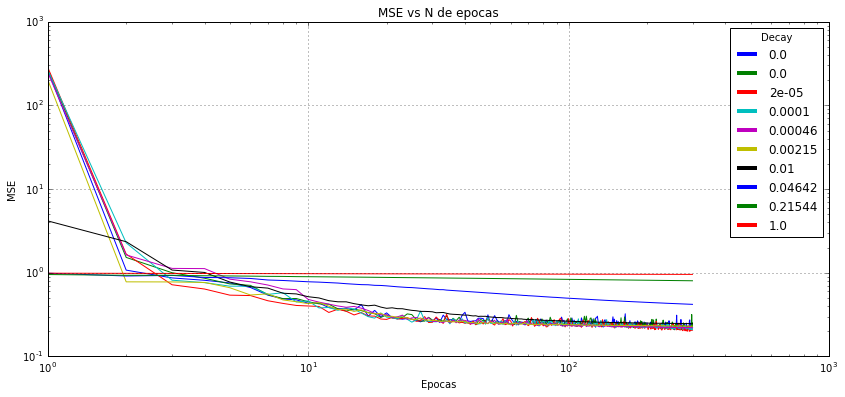

In [107]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)

plt.figure(figsize=(14, 6))

for i in range(n_decay):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.023, decay=lear_decay[i])
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    plt.loglog(hist.epoch, hist.history['loss'], label=str(round(lear_decay[i],5)))
    print("Progressive decay: "+str(round(lear_decay[i],6)) + ", Ultimo MSE de Entrenamiento: " + str(round(hist.history['loss'][-1], 3)))
    
plt.title("MSE vs N de epocas")
plt.xlabel("Epocas")
plt.ylabel("MSE")
plt.grid(True)
leg = plt.legend(title="Decay")
# Ancho de lineas en legend
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)
plt.show()

Evidentemente no cualquier valor de <i>decay</i> resulta en una mejora de los resltados del modelo. Respecto del resultado obtenido en el punto (d), con error cuadrático de 0.22, se aprecia que los valores de <i>decay</i> que consiguen reducir dicho error se encuentran en la zona entre $10^{-6}$ y $10^{-4}$. Se repite el experimento reduciendo en dicho rango. 

Progressive decay: 1e-06, Ultimo MSE de Entrenamiento: 0.264
Progressive decay: 2e-06, Ultimo MSE de Entrenamiento: 0.223
Progressive decay: 3e-06, Ultimo MSE de Entrenamiento: 0.206
Progressive decay: 5e-06, Ultimo MSE de Entrenamiento: 0.204
Progressive decay: 8e-06, Ultimo MSE de Entrenamiento: 0.216
Progressive decay: 1.3e-05, Ultimo MSE de Entrenamiento: 0.214
Progressive decay: 2.2e-05, Ultimo MSE de Entrenamiento: 0.214
Progressive decay: 3.6e-05, Ultimo MSE de Entrenamiento: 0.225
Progressive decay: 6e-05, Ultimo MSE de Entrenamiento: 0.223
Progressive decay: 0.0001, Ultimo MSE de Entrenamiento: 0.215


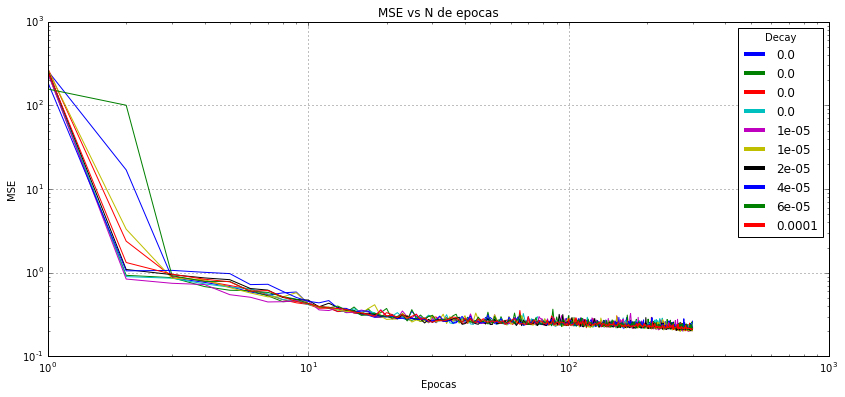

In [109]:
n_decay = 10
lear_decay = np.logspace(-6,-4,n_decay)

plt.figure(figsize=(14, 6))

for i in range(n_decay):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.023, decay=lear_decay[i])
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    plt.loglog(hist.epoch, hist.history['loss'], label=str(round(lear_decay[i],5)))
    print("Progressive decay: "+str(round(lear_decay[i],6)) + ", Ultimo MSE de Entrenamiento: " + str(round(hist.history['loss'][-1], 3)))
    
plt.title("MSE vs N de epocas")
plt.xlabel("Epocas")
plt.ylabel("MSE")
plt.grid(True)
leg = plt.legend(title="Decay")
# Ancho de lineas en legend
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)
plt.show()

En esta ocasión se observa que para configuraciones de <i>decay</i> entre $3*10^{-6}$ y $5*10^{-6}$ se logra menor error cuadrático. Se repite una vez más el experimento, esta vez sobre una distribución homogénea de valores en escala lineal entre $10^{-6}$ y $10^{-5}$.

Progressive decay: 1e-06, Ultimo MSE de Entrenamiento: 0.204
Progressive decay: 2e-06, Ultimo MSE de Entrenamiento: 0.205
Progressive decay: 3e-06, Ultimo MSE de Entrenamiento: 0.211
Progressive decay: 4e-06, Ultimo MSE de Entrenamiento: 0.225
Progressive decay: 5e-06, Ultimo MSE de Entrenamiento: 0.2
Progressive decay: 6e-06, Ultimo MSE de Entrenamiento: 0.258
Progressive decay: 7e-06, Ultimo MSE de Entrenamiento: 0.219
Progressive decay: 8e-06, Ultimo MSE de Entrenamiento: 0.198
Progressive decay: 9e-06, Ultimo MSE de Entrenamiento: 0.214
Progressive decay: 1e-05, Ultimo MSE de Entrenamiento: 0.214


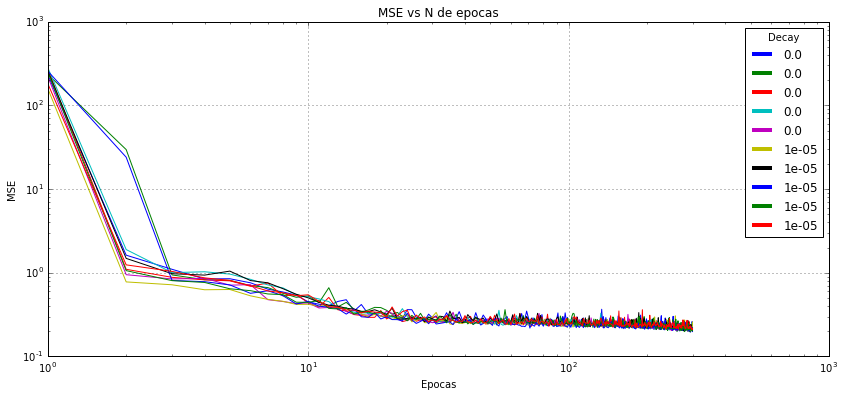

In [116]:
n_decay = 10
lear_decay = np.linspace(0.000001,0.00001,n_decay)

plt.figure(figsize=(14, 6))

for i in range(n_decay):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.023, decay=lear_decay[i])
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    plt.loglog(hist.epoch, hist.history['loss'], label=str(round(lear_decay[i],5)))
    print("Progressive decay: "+str(round(lear_decay[i],6)) + ", Ultimo MSE de Entrenamiento: " + str(round(hist.history['loss'][-1], 3)))
    
plt.title("MSE vs N de epocas")
plt.xlabel("Epocas")
plt.ylabel("MSE")
plt.grid(True)
leg = plt.legend(title="Decay")
# Ancho de lineas en legend
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)
plt.show()

Nuevamente se alcanza algunos valores con error más bajo que previo al uso de <i>progressive decay</i>, pero se observa también que no coinciden exactamente con las observaciones anteriores. La aleatoriedad con que se inicializa el aprendizaje de la red hace que en cada experimento pueda varie lo que podría ser el <i>decay</i> óptmo. Esto puede ser problemático, puesto que el uso de <i>progressive decay</i> con parámetros no adecuados perjudica el desempeño el modelo, según se ha podido observar. 

(i) Entrene el modelo obtenido en d) usando momentum

El uso de <i>momentum</i> es otra estrategia que persigue mejorar la convergencia durante el entrenamiento. Al aplicar <i>gradient descent</i>, en cada iteración se corrige los parámetros tetha según la gradiente calculada con las derivadas parciales de la función de error respecto a los parámetros. Al incorporar <i>momentum</i> simplemente se agrega a lo anterior una componente de memoria, proporcional a los valores theta en la iteración inmediatamente anterior. Se puede interpretar como un factor de inercia, que ante ausencia de un gradiente claramente definido, impulsa al modelo en la dirección que ya traía desde iteraciones anteriores. Lógicamente este método tiene la virtud de mitigar el riesgo de mínimos locales, y se ha observado que mejora la velocidad y error de convergencia. 

La proporción de inercia versus gradiente que se aplique en el aprendizaje del modelo, es el parámetro a configurar al usar <i>momentum</i>. Se procederá a continuación a probar diversas proporciones de <i>momentum</i>, sobre el mismo escenario previamente utilizado de red con función de activación <i>sigmoid</i> y <i>learning rate</i> igual a 0.023.

Momentum: 0.0, Ultimo MSE de Entrenamiento: 0.228
Momentum: 0.05, Ultimo MSE de Entrenamiento: 0.272
Momentum: 0.1, Ultimo MSE de Entrenamiento: 0.245
Momentum: 0.15, Ultimo MSE de Entrenamiento: 0.309
Momentum: 0.2, Ultimo MSE de Entrenamiento: 0.311
Momentum: 0.25, Ultimo MSE de Entrenamiento: 0.282
Momentum: 0.3, Ultimo MSE de Entrenamiento: 0.309
Momentum: 0.35, Ultimo MSE de Entrenamiento: 0.258
Momentum: 0.4, Ultimo MSE de Entrenamiento: 0.24
Momentum: 0.45, Ultimo MSE de Entrenamiento: 0.232
Momentum: 0.5, Ultimo MSE de Entrenamiento: 0.256
Momentum: 0.55, Ultimo MSE de Entrenamiento: 0.212
Momentum: 0.6, Ultimo MSE de Entrenamiento: 0.155
Momentum: 0.65, Ultimo MSE de Entrenamiento: 0.151
Momentum: 0.7, Ultimo MSE de Entrenamiento: 0.161
Momentum: 0.75, Ultimo MSE de Entrenamiento: 0.18
Momentum: 0.8, Ultimo MSE de Entrenamiento: 0.135
Momentum: 0.85, Ultimo MSE de Entrenamiento: 0.146
Momentum: 0.9, Ultimo MSE de Entrenamiento: 0.114
Momentum: 0.95, Ultimo MSE de Entrenamiento

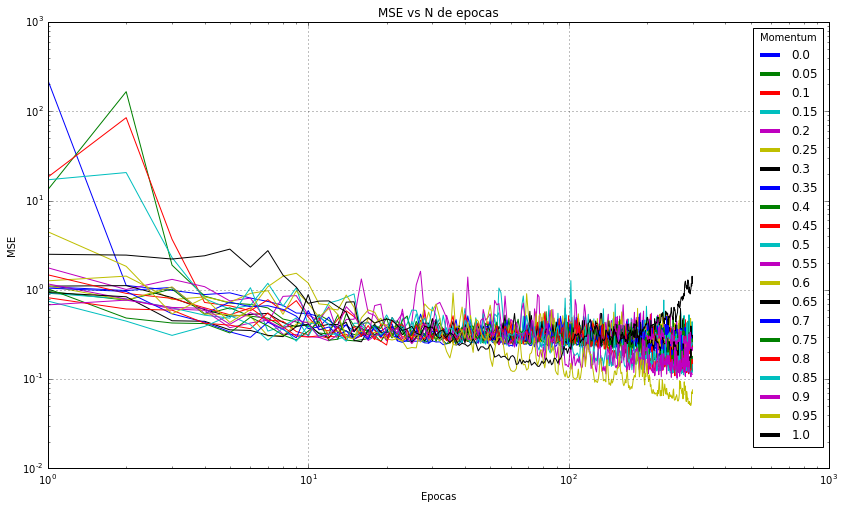

In [134]:
n_decay = 21
momentum = np.linspace(0,1,n_decay)

plt.figure(figsize=(14, 8))


for i in range(n_decay):  
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform', activation='sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.023,momentum=momentum[i])
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    plt.loglog(hist.epoch, hist.history['loss'], label=str(round(momentum[i], 2)))
    print("Momentum: "+str(round(momentum[i],3)) + ", Ultimo MSE de Entrenamiento: " + str(round(hist.history['loss'][-1], 3)))

plt.title("MSE vs N de epocas")
plt.xlabel("Epocas")
plt.ylabel("MSE")
plt.grid(True)
leg = plt.legend(title="Momentum")
# Ancho de lineas en legend
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

plt.show()

Se observa que con <i>momentum</i> 0 o relativamente bajo no se genera efecto significativo en el error cuadratico de convergencia, lo cual es esperable. Al aumentar a valores intermedios puede producir efecto adverso, aumentando el error final. Sin embargo, al superar la proporción de 50% de peso al factor inercial, se observa que consistentemente el error cuadrático medio bajó al aumentar el <i>momentum</i>, que sólo vuelve a incrementarse cuando el <i>momentum</i> alcanza proporción igual a 1, es decir desplaza por completo a la gradiente. Con el valor <i>momentum</i> igual a 0.95 se aprecia que el modelo logra valores consistentemente bajos a partir de 100 iteraciones. Se repetira a continuación el experimento con nuevas variantes del <i>momentum</i> alrededor de esta vecindad. 

Momentum: 0.9, Ultimo MSE de Entrenamiento: 0.124
Momentum: 0.905, Ultimo MSE de Entrenamiento: 0.198
Momentum: 0.91, Ultimo MSE de Entrenamiento: 0.102
Momentum: 0.915, Ultimo MSE de Entrenamiento: 0.144
Momentum: 0.92, Ultimo MSE de Entrenamiento: 0.074
Momentum: 0.925, Ultimo MSE de Entrenamiento: 0.077
Momentum: 0.93, Ultimo MSE de Entrenamiento: 0.078
Momentum: 0.935, Ultimo MSE de Entrenamiento: 0.09
Momentum: 0.94, Ultimo MSE de Entrenamiento: 0.058
Momentum: 0.945, Ultimo MSE de Entrenamiento: 0.067
Momentum: 0.95, Ultimo MSE de Entrenamiento: 0.068
Momentum: 0.955, Ultimo MSE de Entrenamiento: 0.063
Momentum: 0.96, Ultimo MSE de Entrenamiento: 0.082
Momentum: 0.965, Ultimo MSE de Entrenamiento: 0.057
Momentum: 0.97, Ultimo MSE de Entrenamiento: 0.045
Momentum: 0.975, Ultimo MSE de Entrenamiento: 0.055
Momentum: 0.98, Ultimo MSE de Entrenamiento: 0.043
Momentum: 0.985, Ultimo MSE de Entrenamiento: 0.031
Momentum: 0.99, Ultimo MSE de Entrenamiento: 0.024
Momentum: 0.995, Ultimo 

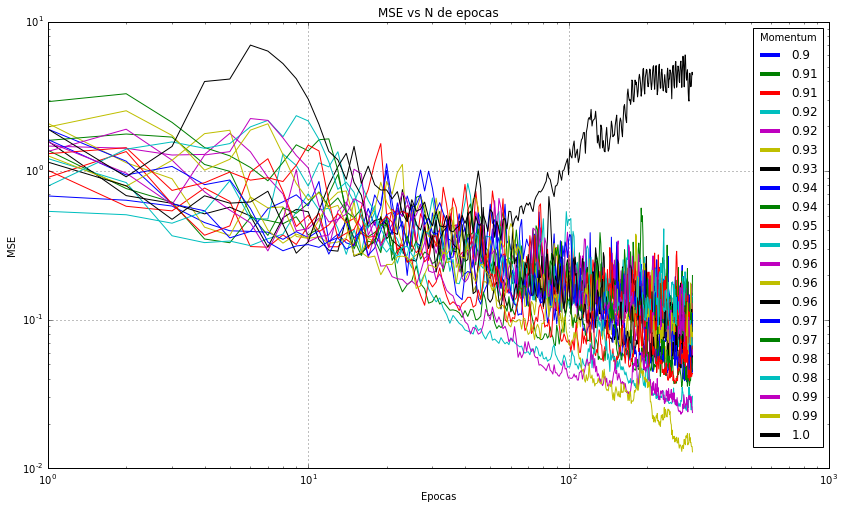

In [136]:
n_decay = 21
momentum = np.linspace(0.9,1,n_decay)

plt.figure(figsize=(14, 8))


for i in range(n_decay):  
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform', activation='sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.023,momentum=momentum[i])
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    plt.loglog(hist.epoch, hist.history['loss'], label=str(round(momentum[i], 2)))
    print("Momentum: "+str(round(momentum[i],3)) + ", Ultimo MSE de Entrenamiento: " + str(round(hist.history['loss'][-1], 3)))

plt.title("MSE vs N de epocas")
plt.xlabel("Epocas")
plt.ylabel("MSE")
plt.grid(True)
leg = plt.legend(title="Momentum")
# Ancho de lineas en legend
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

plt.show()

Nuevamente se aprecia que el <i>momentum</i> que más logra reducir el error final es justo antes de alcanzar el valor 1. Esto indica que utilizar una alta proporción de <i>momentum</i>, mientras se mantenga una mínima componente de gradiente, ha resultado muy ventajoso para encontrar el óptimo global. Hay que tener presente, sin embargo, que esta configuración pareciera estar expuesta a probale <i>overfitting</i>, por lo que el error resultante podría no ser válido ante nuevas observaciones.  

(j) Entrene los modelos obtenidos en d) y e) cambiando el tamaño del batch. Compare SGD, batch y mini-batch.

Se conoce como <i>bath gradient descent</i> como la implementación de <i>gradient descent</i> sobre un único <i>bath</i> del tamaño de la muestra de entrenamiento; <i>online gradient descent</i> como la implementación de <i>gradient descent</i> en batches de una unidad; y <i>mini-batch gradient descent</i> a cualquier implementación intermedia, con batches mayores que 1 y menores que el tamaño de la muestra original. 

Se aplicará a continuación distintas configuraciones de batches al modelo construido con <i>sigmoid</i> y <i>learning rate</i> de 0.023. 

Tamaño de Batch: 1.0, Ultimo MSE de Entrenamiento: nan
Tamaño de Batch: 20.0, Ultimo MSE de Entrenamiento: 0.198
Tamaño de Batch: 39.0, Ultimo MSE de Entrenamiento: 0.218
Tamaño de Batch: 58.0, Ultimo MSE de Entrenamiento: 0.245
Tamaño de Batch: 77.0, Ultimo MSE de Entrenamiento: 0.247
Tamaño de Batch: 96.0, Ultimo MSE de Entrenamiento: 0.234
Tamaño de Batch: 114.0, Ultimo MSE de Entrenamiento: 0.239
Tamaño de Batch: 133.0, Ultimo MSE de Entrenamiento: 0.231
Tamaño de Batch: 152.0, Ultimo MSE de Entrenamiento: 0.241
Tamaño de Batch: 171.0, Ultimo MSE de Entrenamiento: 0.242
Tamaño de Batch: 190.0, Ultimo MSE de Entrenamiento: 0.239
Tamaño de Batch: 209.0, Ultimo MSE de Entrenamiento: 0.238
Tamaño de Batch: 228.0, Ultimo MSE de Entrenamiento: 0.239
Tamaño de Batch: 247.0, Ultimo MSE de Entrenamiento: 0.239
Tamaño de Batch: 266.0, Ultimo MSE de Entrenamiento: 0.238
Tamaño de Batch: 284.0, Ultimo MSE de Entrenamiento: 0.239
Tamaño de Batch: 303.0, Ultimo MSE de Entrenamiento: 0.254
Tamaño

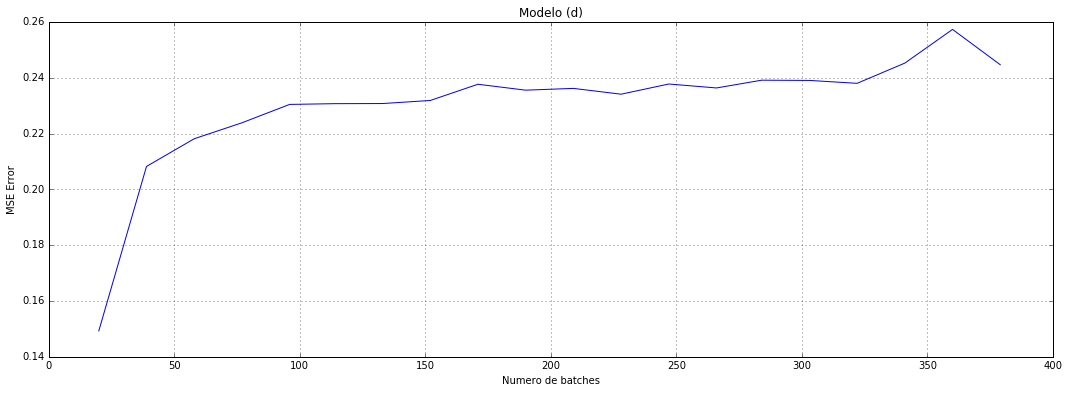

In [163]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

n_batches = 21

batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
hist = []

for b in batch_sizes:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform', activation='sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.023)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist3 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), batch_size=b, nb_epoch=300, verbose=0)
    print( "Tamaño de Batch: "+ str(b) + ", Ultimo MSE de Entrenamiento: " + str(round(hist3.history['loss'][-1], 3)))
    hist.append(model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), batch_size=b, nb_epoch=300, verbose=0))
    
lhist = np.zeros_like(batch_sizes)

for i in range(n_batches):
    lhist[i] = hist[i].history['loss'][-1] # ultimo de errores de cada batch

plt.figure(figsize=(18, 6))
plt.plot(batch_sizes, lhist)
plt.grid(True)
plt.title("Modelo (d)")
plt.xlabel("Numero de batches")
plt.ylabel("MSE Error")
plt.show()

Se observa en primer lugar que aparentemente la red entrenada con <i>sigmoid</i> no es apropiada para entrenamiento <i>online</i>. A continuación se observa que con batches desde 20 unidades ya se obtiene convergencia, y con error cuadrático significativamente menores que con <i>bath gradient descent</i>. Se estima entonces que la implementación de <i>mini-batch gradient descent</i> ha resultado ventajosa en este caso. 

Tamaño de Batch: 1.0, Ultimo MSE de Entrenamiento: 0.015
Tamaño de Batch: 20.0, Ultimo MSE de Entrenamiento: 0.029
Tamaño de Batch: 39.0, Ultimo MSE de Entrenamiento: 0.047
Tamaño de Batch: 58.0, Ultimo MSE de Entrenamiento: 0.057
Tamaño de Batch: 77.0, Ultimo MSE de Entrenamiento: 0.07
Tamaño de Batch: 96.0, Ultimo MSE de Entrenamiento: 0.079
Tamaño de Batch: 114.0, Ultimo MSE de Entrenamiento: 0.077
Tamaño de Batch: 133.0, Ultimo MSE de Entrenamiento: 0.087
Tamaño de Batch: 152.0, Ultimo MSE de Entrenamiento: 0.087
Tamaño de Batch: 171.0, Ultimo MSE de Entrenamiento: 0.088
Tamaño de Batch: 190.0, Ultimo MSE de Entrenamiento: 0.104
Tamaño de Batch: 209.0, Ultimo MSE de Entrenamiento: 0.103
Tamaño de Batch: 228.0, Ultimo MSE de Entrenamiento: 0.103
Tamaño de Batch: 247.0, Ultimo MSE de Entrenamiento: 0.104
Tamaño de Batch: 266.0, Ultimo MSE de Entrenamiento: 0.102
Tamaño de Batch: 284.0, Ultimo MSE de Entrenamiento: 0.101
Tamaño de Batch: 303.0, Ultimo MSE de Entrenamiento: 0.102
Tamañ

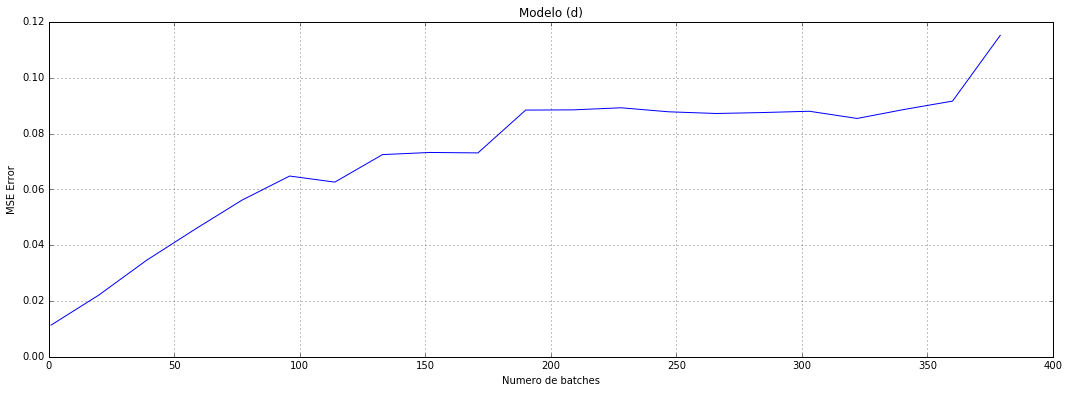

In [160]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

n_batches = 21

batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
hist = []

for b in batch_sizes:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.023)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist3 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), batch_size=b, nb_epoch=300, verbose=0)
    print( "Tamaño de Batch: "+ str(b) + ", Ultimo MSE de Entrenamiento: " + str(round(hist3.history['loss'][-1], 3)))
    hist.append(model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), batch_size=b, nb_epoch=300, verbose=0))
    
lhist = np.zeros_like(batch_sizes)

for i in range(n_batches):
    lhist[i] = np.mean(hist[i].history['loss']) # promedio de errores de cada batch

plt.figure(figsize=(18, 6))
plt.plot(batch_sizes, lhist)
plt.grid(True)
plt.title("Modelo (d)")
plt.xlabel("Numero de batches")
plt.ylabel("MSE Error")
plt.show()

A diferencia de con <i>sigmoid</i>, con <i>ReLu</i> sí se obtiene convergencia para <i>online gradient descent</i>, con el error cuadrático medio más bajo en este caso. Se aprecia también que en la medida que se aplica <i>mini-batch gradient descent</i> con tamaño progresivamente más grande, consistentemente aumenta el error. 

<img src="img/figure3.png">

## 3 Reconocimiento de Imágenes en CIFAR10

En esta sección trabajaremos con un dataset bastante conocido y utilizado por la comunidad para experimentar con reconocimiento de objetos en imágenes: CIFAR10. Se trata de un conjunto de 60.000 imágenes RGB de 32 × 32 pixeles que contiene 10 clases de objetos y 6000 ejemplos por clase. La versión utilizada se atribuye a A. Krizhevsky, V. Nair y G. Hinton [3] y viene separada en 50000 ejemplos de entrenamiento y 10000 casos de prueba. El conjunto de pruebas fue obtenido seleccionando 1000 imágenes aleatorias de cada clase. Los datos restantes han sido ordenados aleatoriamente y están organizados en 5 bloques de entrenamiento (batches). Las clases son mutuamente excluyentes y corresponden a las siguientes categorías: gatos, perros, ranas, caballos, pájaros, ciervos, aviones, automóviles, camiones y barcos.

Los datos asociados a esta actividad podr´an ser obtenidos utilizando los siguientes comandos en la l´ınea
de comandos (sistemas UNIX)

$\texttt{wget http://octopus.inf.utfsm.cl/~ricky/data.tar.gz}$

$\texttt{tar -xzvf data.tar.gz}$

$\texttt{rm data.tar.gz}$

En la carpeta generada encontrarán 5 archivos denominados 'data batch 1', 'data batch 2', 'data batch 3', 'data batch 4', 'data batch 5' y 'test batch' correspondientes a los 5 bloques de entrenamiento y al conjunto de pruebas respectivamente. Los archivos corresponden a diccionarios serializados de python y pueden ser "extraídos" utilizando la siguiente función:

In [21]:
def unpickle(file):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

Una vez extraódo, cada diccionario contendrá 2 elementos importantes: *data* y *labels*. El primer elemento (*data*) es un matriz de 10000×3072 (numpy array). Cada fila de esa matriz corresponde a una imagen *RGB*: los primeros 1024 valores vienen del canal $R$, los siguientes 1024 del canal $G$, y los últimos 1024 del canal $B$. Para cada canal, las imágenes han sido vectorizadas por filas, de modo que los primeros 32 valores del canal $R$ corresponden a la primera fila de la imagen. Por otro lado, el elemento (*labels*) del diccionario contiene una lista de 1000 valores enteros entre 0 y 9 que identifican las clases antes enumeradas.

In [22]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(a) Construya una función que cargue todos los bloques de entrenamiento y pruebas del problema CIFAR generando como salida: (i) dos matrices $X_{tr}$, $Y_{tr}$, correspondientes a las imágenes y etiquetas de entrenamiento, (ii) dos matrices $X_t$, $Y_t$, correspondientes a las imágenes y etiquetas de pruebas, y finalmente (iii) dos matrices $X_v$, $Y_v$, correspondientes a imágenes y etiquetas que se usarán como conjunto de validación, es decir para tomar decisiones de diseño acerca del modelo. Este último conjunto debe ser extraído desde el conjunto de entrenamiento original y no debe superar las 5000 imágenes.

In [5]:
import cPickle as pickle
import numpy as np
import os
from scipy.misc import imread

def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(PATH):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(PATH, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_one(os.path.join(PATH, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

(b) Construya una función que escale apropiadamente las imágenes antes de trabajar. Experimente sólo centrando los datos y luego centrando y escalándolos como en actividades anteriores.

In [6]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

def normalize_data(centering, scaling):
    Xtr, Ytr, Xte, Yte = load_CIFAR10("datasets/")
    # Se centra y escalan los datos y se hace enfasis en que el fit es sobre la data de training
    scaler = StandardScaler(with_mean=centering, with_std=scaling).fit(Xtr)
    
    # Normalización del conjunto de entrenamiento
    Xtr_scaled = scaler.transform(Xtr)
    
    # Normalización del conjunto de testing
    Xte_scaled = scaler.transform(Xte)

    del Xtr, Xte
    return Xtr_scaled, Ytr, Xte_scaled, Yte

Utilizando las funciones de *Scikit Learn* tenemos la posibilidad tanto de centrar como de escalar los datos. En el caso de centrar los datos, restamos la media de cada columna mientras que para centrar y escalar los datos, además de restar la media, cada columna es dividida por la desviación estándar.

(c) Diseñe, entrene y evalúe una red neuronal con salida softmax para el problema CIFAR a partir de la representación original de las imágenes (píxeles RGB). Experimente con distintas arquitecturas y métodos de entrenamiento, midiendo el error de clasificación sobre el conjunto de validación. En base a esta última medida de desempeño, decida qué modelo, de entre todos los evaluados, evaluará finalmente en el conjunto de test. Reporte y discuta los resultados obtenidos. Se espera que logre obtener un error de pruebas menor o igual a 0.5.

Para revisar la información que estamos manejando, desarrollamos la siguiente función que muestra algunos ejemplos y sus respectivas clases: 

frog


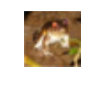

truck


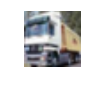

truck


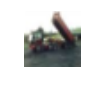

deer


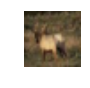

automobile


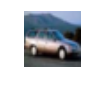

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np 
    
def show_sample(Xtr, Ytr, label_name):   
    r, g, b = np.split(Xtr, 3)
    rgbArray = np.zeros((32,32,3), 'uint8')
    rgbArray[:,:,0] = np.reshape(r, (-1, 32))
    rgbArray[:,:,1] = np.reshape(g, (-1, 32))
    rgbArray[:,:,2] = np.reshape(b, (-1, 32))
    img = Image.fromarray(rgbArray)
    print(label_name)
    plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(img)
    plt.show()
                     
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Xtr, Ytr, _ , _ = load_CIFAR10("datasets/")

for i in range(5):
    show_sample(Xtr[i], Ytr[i], label_names[Ytr[i]])

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

n_classes = 10

# Cargar datos normalizados
Xtr, Ytr, Xte, Yte = normalize_data(True, True)

Y_train = np_utils.to_categorical(Ytr, n_classes)
Y_test = np_utils.to_categorical(Yte, n_classes)

model = Sequential()

# Input layer (3072 nodos) - Hidden layer (64 nodos)
model.add(Dense(64, input_dim=Xtr.shape[1], init='uniform')) 
model.add(Activation('relu'))

# Hidden layer
model.add(Dense(64, init='uniform'))
model.add(Activation('relu'))

# Output layer
model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

hist = model.fit(Xtr, Y_train, nb_epoch=300, batch_size=32, verbose=0)
score = model.evaluate(Xte, Y_test)
print("Accuracy:", score[1]*100)

 9984/10000 [============================>.] - ETA: 0s('Accuracy:', 45.200000000000003)


Los modelos experimentados fueron los siguientes:

* **Modelo 1**:
 - Capa de entrada: 3072 neuronas.
 - Capa oculta 1: 128 neuronas. Función de activación: Tangente Hiperbólica.
 - Capa oculta 2: 128 neuronas. Función de activación: Lineal.
 - Capa de salida: 10 neuronas. Función de activación: Softmax.
 - Método de entrenamiento: SGD:
     - Learning rate: 0.2
     - Decay: 1e-6
     - Momentum: 0.9
 - Función de costo: Categorical Crossentropy
 - Número de épocas: 400.
 - Tamaño de batch: 3072.
 - **Ajuste del modelo: 42%**
 
 
* **Modelo 2**:
 - Capa de entrada: 3072 neuronas.
 - Capa oculta 1: 64 neuronas. Función de activación: ReLu.
 - Capa oculta 2: 64 neuronas. Función de activación: ReLu.
 - Capa de salida: 10 neuronas. Función de activación: Softmax.
 - Método de entrenamiento: SGD:
     - Learning rate: 0.01
     - Decay: 1e-6
     - Momentum: 0.9
 - Función de costo: Categorical Crossentropy
 - Número de épocas: 200.
 - Tamaño de batch: 32.
 - **Ajuste del modelo: 30%**
 
 
* **Modelo 3**:
 - Capa de entrada: 3072 neuronas.
 - Capa oculta 1: 64 neuronas. Función de activación: Tangente Hiperbólica.
 - Capa oculta 2: 64 neuronas. Función de activación: Tangente Hiperbólica.
 - Capa de salida: 10 neuronas. Función de activación: Softmax.
 - Método de entrenamiento: SGD:
     - Learning rate: 0.01
     - Decay: 1e-6
     - Momentum: 0.9
 - Función de costo: Categorical Crossentropy
 - Número de épocas: 200.
 - Tamaño de batch: 32.
 - **Ajuste del modelo: 21%**
 
 
* **Modelo 4**:
 - Capa de entrada: 3072 neuronas.
 - Capa oculta 1: 64 neuronas. Función de activación: Tangente Hiperbólica.
 - Capa oculta 2: 64 neuronas. Función de activación: Tangente Hiperbólica.
 - Capa de salida: 10 neuronas. Función de activación: Softmax.
 - Método de entrenamiento: SGD:
     - Learning rate: 0.01
     - Decay: 1e-6
     - Momentum: 0.9
 - Función de costo: Categorical Crossentropy
 - Número de épocas: 200.
 - Tamaño de batch: 32.
 - **Ajuste del modelo: 21%**
 

* **Modelo 5**:
 - Capa de entrada: 3072 neuronas.
 - Capa oculta 1: 64 neuronas. Función de activación: ReLu.
 - Capa oculta 2: 64 neuronas. Función de activación: ReLu.
 - Capa de salida: 10 neuronas. Función de activación: Softmax.
 - Método de entrenamiento: SGD:
     - Learning rate: 0.01
 - Función de costo: Categorical Crossentropy
 - Número de épocas: 400.
 - Tamaño de batch: 32.
 - **Ajuste del modelo: 45%**

De los resultados anteriores (*se probaron al menos 10 configuraciones más obteniendo valores de ajuste inferiores a 10% por lo que se omitieron*). Dado los bajos resultados de ajuste, revisamos referencias en la web, donde la solución propuesta para obtener un ajuste y valor de error pequeño, es el uso de *Redes Neuronales Convolucionales*. Dado que aún no revisamos este tópico, no nos basamos en la implementación de la solución propuesta. Además, nos encontramos con soluciones similares en el uso de *FF* con *softmax* para clasificación. Para las próximas actividades utilizaremos el último mejor modelo que obtuvimos.

(d) Repita la actividad anterior, pero mejorando los atributos utilizados para representar las imágenes. Para esta parte, se distribuirá junto a esta tarea una función denominada *extract_features.py* que extraerá 2 tipos de representaciones sobre una imagen y conjunto de imágenes: (i) histogramas de tono [6], (ii) descriptores HOG [5]. Reporte y discuta los resultados obtenidos utilizando las distintas representaciones por separado o todas simultáneamente. La función *extract_features.py* estará definida en un script denominado *top_level_features.py* y puede ser importada y utilizada como se muestra a continuación.

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from top_level_features import hog_features
from top_level_features import color_histogram_hsv
from top_level_features import extract_features

Xtr, Ytr, Xte, Yte = load_CIFAR10("datasets/")
n_classes = 10

(i) Histogramas de tono

In [13]:
# Extrae histogramas de color
Xtr_HSV = extract_features(Xtr,[color_histogram_hsv])
Xte_HSV = extract_features(Xte,[color_histogram_hsv])

# Conversion vectores tipo categoricos
Y_train = np_utils.to_categorical(Ytr, n_classes)
Y_test = np_utils.to_categorical(Yte, n_classes)

model = Sequential()

# Input layer (144 nodos) - Hidden layer (64 nodos)
model.add(Dense(64, input_dim=Xtr_HSV.shape[1], init='uniform')) 
model.add(Activation('relu'))

# Hidden layer
model.add(Dense(64, init='uniform'))
model.add(Activation('relu'))

# Output layer
model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

hist = model.fit(Xtr_HSV, Y_train, nb_epoch=300, batch_size=32, verbose=0)
score = model.evaluate(Xte_HSV, Y_test)
print("Accuracy:", score[1]*100)

(50000L, 32L, 32L, 3L)
(10000L, 32L, 32L, 3L)
 9984/10000 [============================>.] - ETA: 0s('Accuracy:', 27.700000000000003)


(ii) Descriptores de HOG

In [12]:
# Extrae hog features
Xtr_HOG = extract_features(Xtr,[hog_features]) # training set
Xte_HOG = extract_features(Xte,[hog_features]) # testing set

# Conversion vectores tipo categoricos
Y_train = np_utils.to_categorical(Ytr, n_classes)
Y_test = np_utils.to_categorical(Yte, n_classes)

model = Sequential()

# Input layer (144 nodos) - Hidden layer (64 nodos)
model.add(Dense(64, input_dim=Xtr_HOG.shape[1], init='uniform')) 
model.add(Activation('relu'))

# Hidden layer
model.add(Dense(64, init='uniform'))
model.add(Activation('relu'))

# Output layer
model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

hist = model.fit(Xtr_HOG, Y_train, nb_epoch=300, batch_size=32, verbose=0)
score = model.evaluate(Xte_HOG, Y_test)
print("Accuracy:", score[1]*100)

(50000L, 32L, 32L, 3L)
(10000L, 32L, 32L, 3L)
 9696/10000 [============================>.] - ETA: 0s('Accuracy:', 51.690000000000005)


(iii) Histogramas de tono y HOG

In [14]:
# Extrae HOG y HSV
Xtr_HOGHSV = extract_features(Xtr,[hog_features, color_histogram_hsv]) 
Xte_HOGHSV = extract_features(Xte,[hog_features, color_histogram_hsv])

# Conversion vectores tipo categoricos
Y_train = np_utils.to_categorical(Ytr, n_classes)
Y_test = np_utils.to_categorical(Yte, n_classes)

model = Sequential()

# Input layer (144 nodos) - Hidden layer (64 nodos)
model.add(Dense(64, input_dim=Xtr_HOGHSV.shape[1], init='uniform')) 
model.add(Activation('relu'))

# Hidden layer
model.add(Dense(64, init='uniform'))
model.add(Activation('relu'))

# Output layer
model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

hist = model.fit(Xtr_HOGHSV, Y_train, nb_epoch=300, batch_size=32, verbose=0)
score = model.evaluate(Xte_HOGHSV, Y_test)
prbint("Accuracy:", score[1]*100)

(50000L, 32L, 32L, 3L)
(10000L, 32L, 32L, 3L)
10000/10000 [==============================] - 0s     
('Accuracy:', 54.210000000000001)


Luego de realizar las pruebas correspondientes obtuvimos los siguientes resultados:

<table>
    <tr>
        <td><strong>Mejora</strong></td>
        <td><strong>Accuracy</strong></td>
    </tr>
    <tr>
        <td>Ninguna</td>
        <td>45%</td>
    </tr>
    <tr>
        <td>Histograma de Tono</td>
        <td>27.7%</td>
    </tr>
    <tr>
        <td>Descriptores de HOG</td>
        <td>51.7%</td>
    </tr>
    <tr>
        <td>Ambos</td>
        <td>54%</td>
    </tr>
</table>

Finalmente podemos concluir que utilizando en conjunto el *Histograma de Tono* y *Descriptores de HOG*, se obtuvieron mejores resultados en el ejercicio de clasificación. Para los *Descriptores de HOG* también se obtuvo un *accuracy* considerable dada las características del problema. Como se menciono anteriormente, este enfoque no obtiene resultados considerablemente buenos, pero aún así es una herramienta bastante útil que computacionalmente se puede mejorar con una mayor disponibilidad de recursos computacionales.

## Referencias

1. Hastie, T.; Tibshirani, R., Friedman, J. (2009), The Elements of Statistical Learning, Second Edition. Springer New York Inc.
* Bishop, Christopher M. (1995). Neural Networks for Pattern Recognition, Clarendon Press.
* Krizhevsky, A., Hinton, G. (2009). Learning multiple layers of features from tiny images.
* Harrison, D. and Rubinfeld, D. (1978). Hedonic prices and the demand for clean air, Journal of Environmental Economics and Management, 5, 81-102
* Dalal, N., Triggs, B. (2005, June). Histograms of oriented gradients for human detection. In 2005 IEEE Computer Society Conference on Computer Vision and Pattern Recognition (CVPR’05) (Vol. 1, pp.886-893). IEEE.
* Forsyth, D. A., Ponce, J. (2002). Computer vision: a modern approach. Prentice Hall Professional Technical Reference.